In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("willianoliveiragibin/healthcare-insurance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/healthcare-insurance


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv("/kaggle/input/healthcare-insurance/insurance.csv")

In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


this dataset dosen't have null value , not missing value , no reapating value

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

#Analysis till now
| Column     | Type    | Description                                                               |
| ---------- | ------- | ------------------------------------------------------------------------- |
| `age`      | int64   | Age of the individual                                                     |
| `sex`      | object  | Gender: typically "male" or "female"                                      |
| `bmi`      | float64 | Body Mass Index (BMI)                                                     |
| `children` | int64   | Number of children covered by health insurance                            |
| `smoker`   | object  | Smoking status: "yes" or "no"                                             |
| `region`   | object  | Residential region in the US: southwest, southeast, northwest, northeast  |
| `charges`  | float64 | Medical insurance charges (target variable for many analyses/predictions) |


###EDA

Text(0.5, 1.0, 'Number of Children')

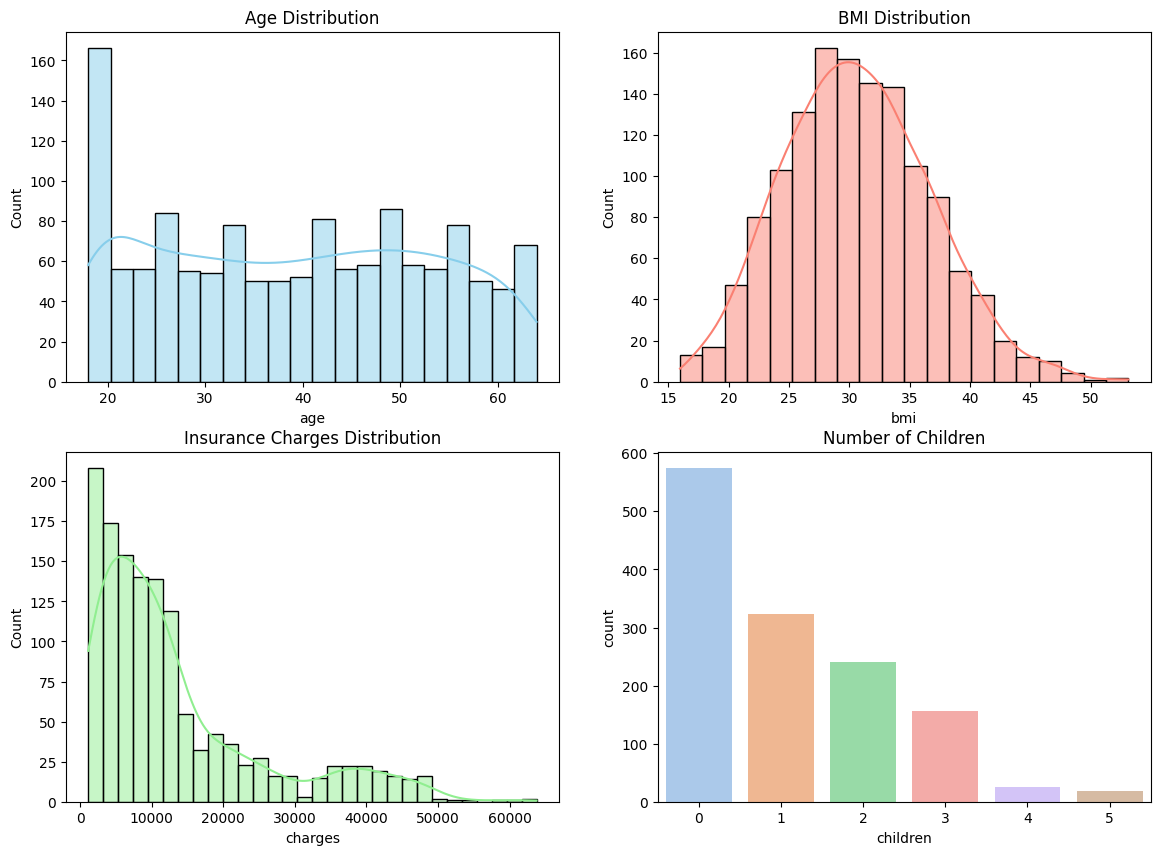

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Age distribution
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')

# BMI distribution
sns.histplot(df['bmi'], bins=20, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('BMI Distribution')

# Charges distribution
sns.histplot(df['charges'], bins=30, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Insurance Charges Distribution')

# Children count
sns.countplot(x='children', data=df, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Number of Children')


<Axes: xlabel='region', ylabel='Count'>

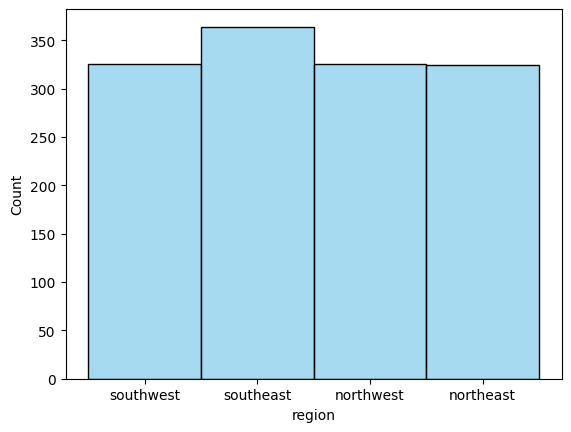

In [ ]:
sns.histplot(df['region'], color='skyblue')

In [ ]:
df.describe(include ="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


1. Age:


    Uniform distribution across 18 to 64.

    Median age is 39.

    --> Business Insight: Product offerings can be segmented by age bands (e.g., <30, 30–50, >50) for personalized insurance products.

2. BMI:


    Mean BMI ≈ 30.6 — borderline obese.

    Right-skewed distribution: some outliers above 45.

    --> Actionable Decision: Introduce wellness programs or discounts for customers maintaining healthy BMI levels.

3. Charges:


    Highly right-skewed: mean ≈ $13,270, but max ≈ $63,770.

    Median is much lower ($9,382), indicating a few high-cost individuals.

    --> Business Action: Consider reinsurance or premium tiers for high-risk groups (e.g., older smokers with high BMI).

4. Children


    Most customers have ≤ 2 children.

    --> Strategy: Family plans can be tiered based on number of children.

Text(0.5, 1.0, 'Region Distribution')

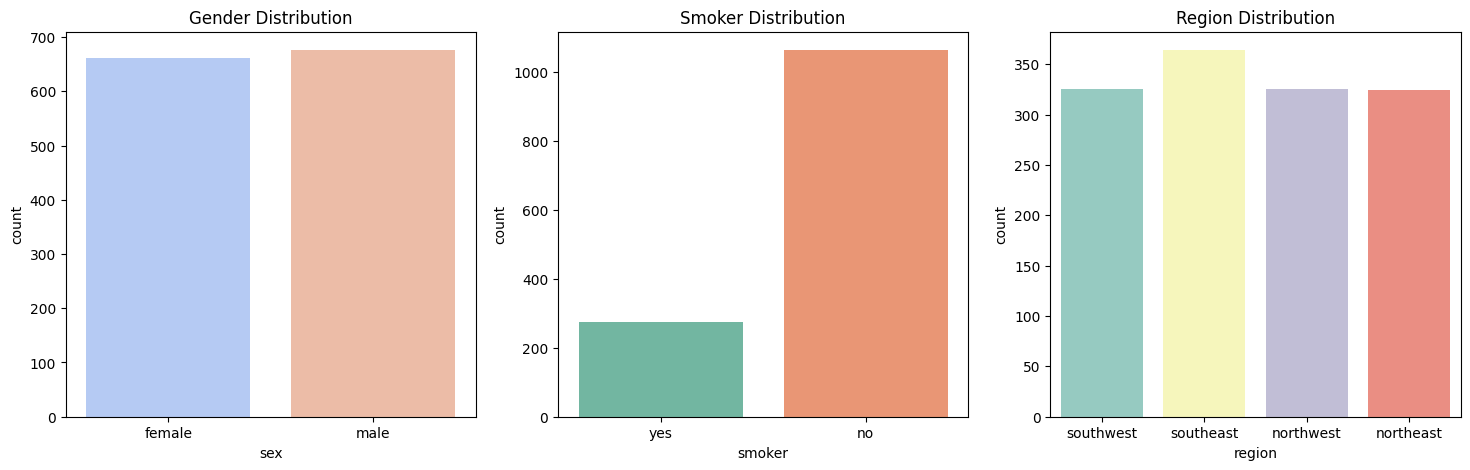

In [ ]:
# Count plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sex
sns.countplot(x='sex', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title('Gender Distribution')

# Smoker
sns.countplot(x='smoker', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Smoker Distribution')

# Region
sns.countplot(x='region', data=df, ax=axes[2], palette='Set3')
axes[2].set_title('Region Distribution')

Gender Distribution:

    Balanced: ~50% male and female.

    --> No immediate business bias, but segmented marketing could still help.

 Smoker Status:

    Majority are non-smokers (~80%), but smokers may be driving high charges.

    --> Business Insight: Risk-adjusted pricing for smokers is essential.

 Region:

    Fairly balanced regional spread, with slightly more customers in the southeast.

    --> Targeted regional marketing campaigns or network partnerships could optimize operations.

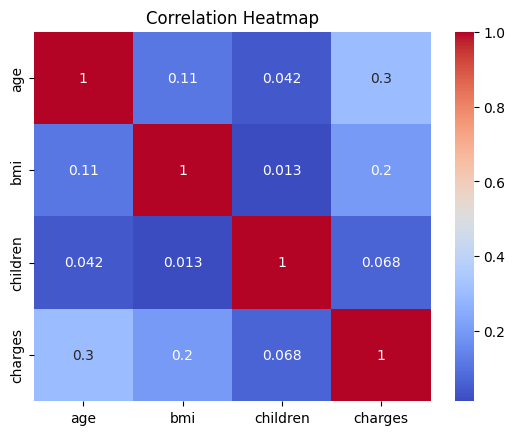

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso, Ridge

In [ ]:
df_encoded = df.copy()
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df_encoded['sex'] = le_sex.fit_transform(df_encoded['sex'])
df_encoded['smoker'] = le_smoker.fit_transform(df_encoded['smoker'])
df_encoded['region'] = le_region.fit_transform(df_encoded['region'])

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

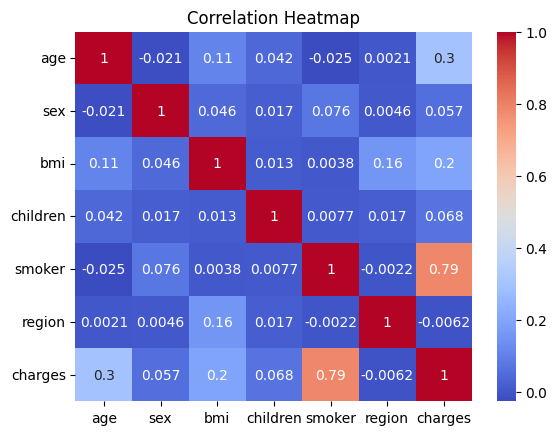

In [ ]:
corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df_encoded.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [ ]:
X


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1070, 6)

In [ ]:
X_test.shape

(268, 6)

In [ ]:
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Training Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Testing Metrics
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"{name}")
    print(f"  Train MSE: {train_mse:.2f}, Train R²: {train_r2:.2f}")
    print(f"  Test  MSE: {test_mse:.2f}, Test  R²: {test_r2:.2f}")
    print("-" * 50)


Linear Regression
  Train MSE: 37280663.22, Train R²: 0.74
  Test  MSE: 33635210.43, Test  R²: 0.78
--------------------------------------------------
Lasso
  Train MSE: 37280669.56, Train R²: 0.74
  Test  MSE: 33637843.02, Test  R²: 0.78
--------------------------------------------------
Ridge
  Train MSE: 37280760.55, Train R²: 0.74
  Test  MSE: 33641818.59, Test  R²: 0.78
--------------------------------------------------
Random Forest
  Train MSE: 3482855.33, Train R²: 0.98
  Test  MSE: 21010665.88, Test  R²: 0.86
--------------------------------------------------
XGBoost
  Train MSE: 845968.69, Train R²: 0.99
  Test  MSE: 23261243.81, Test  R²: 0.85
--------------------------------------------------
Gradient Boosting
  Train MSE: 14715394.94, Train R²: 0.90
  Test  MSE: 18932125.41, Test  R²: 0.88
--------------------------------------------------
Decision Tree
  Train MSE: 244239.55, Train R²: 1.00
  Test  MSE: 48615695.52, Test  R²: 0.69
-----------------------------------------

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predicted_vs_actual(model, X_test, y_test, model_name,ax):
    y_pred = model.predict(X_test)

    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, ax=ax) # Added ax=ax
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line, call plot on ax
    ax.set_xlabel('Actual Charges') # Call set_xlabel on ax
    ax.set_ylabel('Predicted Charges') # Call set_ylabel on ax
    ax.set_title(f'{model_name} - Predicted vs Actual') # Call set_title on ax
    ax.grid(True) # Call grid on ax
    # plt.tight_layout()
    # plt.show()


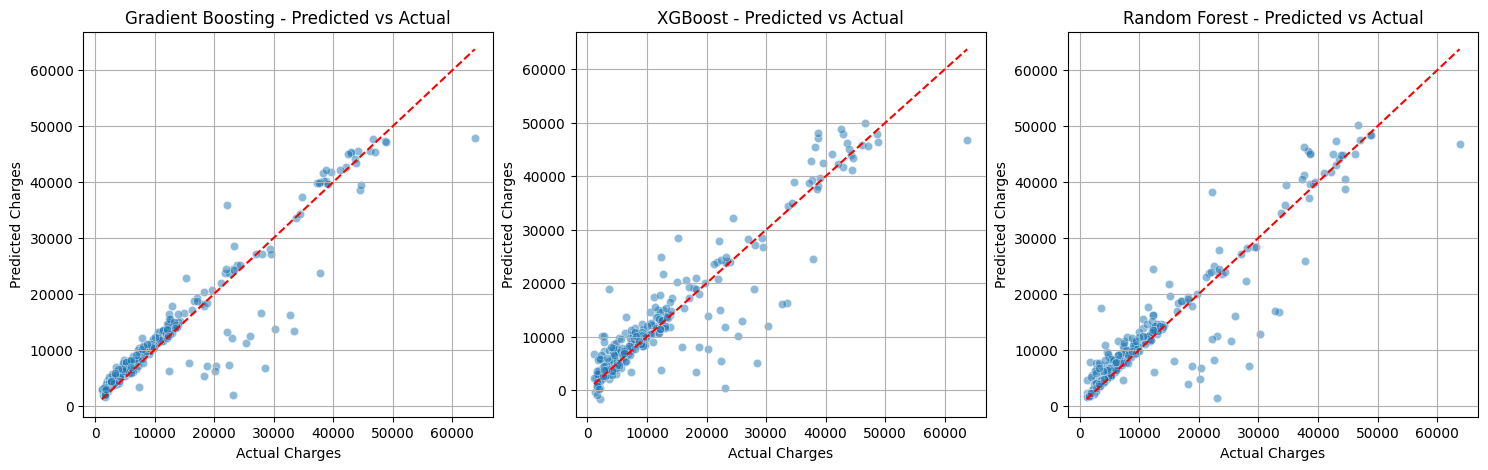

In [ ]:
gradient_boosting_model = models['Gradient Boosting']
xgboost_model = models['XGBoost']
random_forest_model = models['Random Forest']

# Call the plotting function with the specific model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_predicted_vs_actual(gradient_boosting_model, X_test_scaled, y_test, "Gradient Boosting",ax=axes[0])
plot_predicted_vs_actual(xgboost_model, X_test_scaled, y_test, "XGBoost",ax=axes[1])
plot_predicted_vs_actual(random_forest_model, X_test_scaled, y_test, "Random Forest",ax=axes[2])

In [ ]:
def plot_residuals(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Charges')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Residuals')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


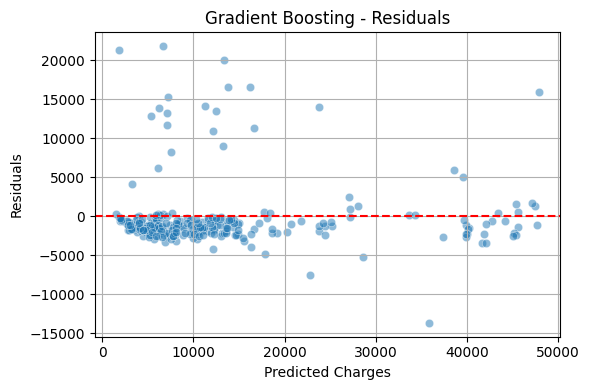

In [ ]:
plot_residuals(gradient_boosting_model, X_test_scaled, y_test, "Gradient Boosting")


In [ ]:
def plot_feature_importance(model, feature_names, model_name,ax):
    importances = model.feature_importances_

    # plt.figure(figsize=(7, 4))
    sns.barplot(x=importances, y=feature_names, ax=ax) # Pass the ax object to seaborn
    ax.set_title(f'{model_name} - Feature Importances') # Use ax.set_title
    ax.set_xlabel('Importance') # Use ax.set_xlabel
    ax.set_ylabel('Features') # Use ax.set_ylabel
    # plt.tight_layout()
    # plt.show()


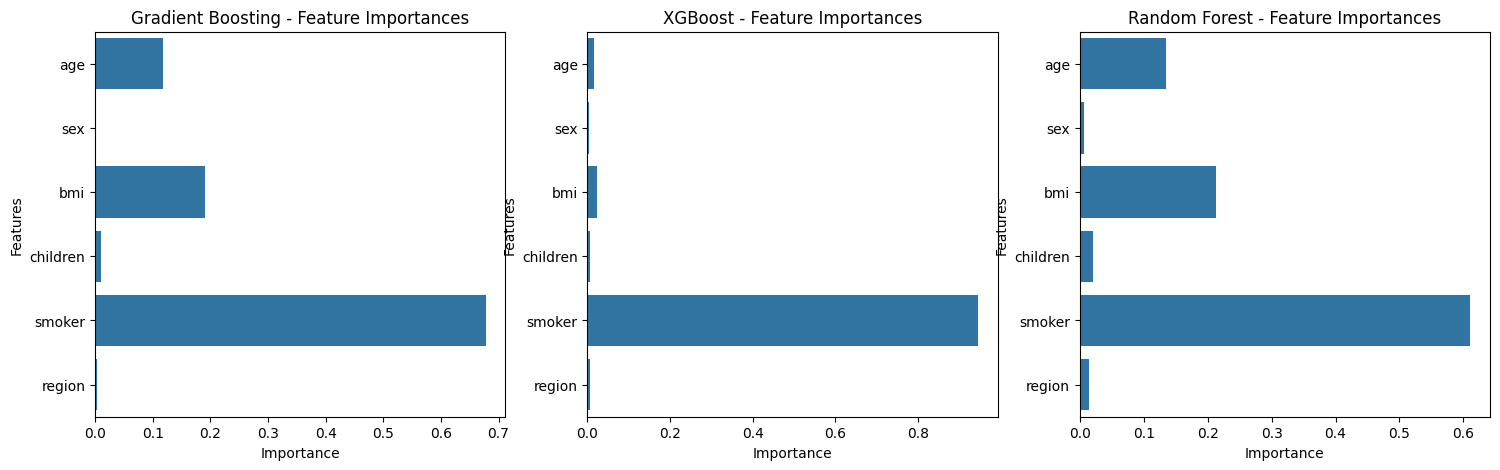

In [ ]:
feature_names = X.columns  # original column names before scaling
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_feature_importance(gradient_boosting_model, feature_names, "Gradient Boosting",ax = axes[0])
plot_feature_importance(xgboost_model, feature_names, "XGBoost",ax = axes[1])
plot_feature_importance(random_forest_model, feature_names, "Random Forest",ax = axes[2])


In [ ]:
import pickle

# Save model
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gradient_boosting_model, f)


##Day 2

In [1]:
import pickle
with open("gradient_boosting_model.pkl", "rb") as f:
    model = pickle.load(f)

In [36]:
data = {
    'age': [19],
    'sex': ['male'],
    'bmi': [28.6],
    'children': [0],
    'smoker': ['no'],
    'region': ['northwest']
}


In [3]:
import pandas as pd

In [37]:
new_df = pd.DataFrame(data)

In [38]:
new_df

,age,sex,bmi,children,smoker,region
0,19,male,28.6,0,no,northwest


###Will be Creating Pipeline -
as it will help the structture to more precise deployment easy.


we will be doing

ColumnTransformer for preprocessing (LabelEncoding, Scaling)

Pipeline to chain preprocessing + model

GradientBoostingRegressor as the model

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat',  OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [16]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

In [24]:
X = df.drop('charges', axis=1)
y = df['charges']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape

(1070, 6)

In [27]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', GradientBoostingRegressor())])

In [28]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


def evaluate_model(pipeline, X_train, y_train, X_test, y_test, model_name):
    print(f"Evaluation Report for: {model_name}")
    print("-" * 50)

    # Training predictions
    y_train_pred = pipeline.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Testing predictions
    y_test_pred = pipeline.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"Training Set:")
    print(f"  R² Score : {train_r2:.4f}")
    print(f"  MAE      : {train_mae:,.2f}")
    print(f"  MSE      : {train_mse:,.2f}")
    print(f"  RMSE     : {train_rmse:,.2f}\n")

    print(f"Testing Set:")
    print(f"  R² Score : {test_r2:.4f}")
    print(f"  MAE      : {test_mae:,.2f}")
    print(f"  MSE      : {test_mse:,.2f}")
    print(f"  RMSE     : {test_rmse:,.2f}")

    print("-" * 50)

In [29]:
evaluate_model(pipeline, X_train, y_train, X_test, y_test, "Gradient Boosting Pipeline")

📊 Evaluation Report for: Gradient Boosting Pipeline
--------------------------------------------------
📘 Training Set:
  R² Score : 0.8997
  MAE      : 2,096.94
  MSE      : 14,472,243.69
  RMSE     : 3,804.24

📕 Testing Set:
  R² Score : 0.8794
  MAE      : 2,405.50
  MSE      : 18,726,210.13
  RMSE     : 4,327.38
--------------------------------------------------


In [30]:
import pickle

with open('insurance_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)



In [31]:
with open('insurance_pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

In [43]:
prediction = loaded_pipeline.predict(new_df)
print(f"Predicted insurance cost: ${prediction[0]:,.2f}")

Predicted insurance cost: $1,786.73
